# **Prédire les défauts de paiement**

#****Business Problem****


Le **constat** : L'entreprise de crédit fait face à un risque financier majeur : le défaut de paiement. Lorsqu'un client ne rembourse pas son crédit, cela engendre une perte sèche pour l'établissement. Actuellement, l'entreprise a besoin d'un moyen fiable pour distinguer les "bons" payeurs des "mauvais" payeurs avant ou pendant la durée du crédit.

#****Objectif Principal****


Construire un modèle de classification binaire supervisée capable de prédire la probabilité qu'un client soit en défaut de paiement le mois suivant (variable cible default.payment.next.month).

**Classe 0 : Le client paiera (Bon payeur).**

**Classe 1 : Le client fera défaut (Risque).**



***Objectifs Techniques Spécifiques***

Algorithme : Mettre en œuvre une Régression Logistique, un modèle standard dans le secteur bancaire pour sa capacité à fournir non seulement une classe, mais une probabilité de risque explicable.

Métriques de performance :

Ne pas se fier uniquement à l'exactitude (Accuracy).

Maximiser le Recall (Rappel) pour la classe "Défaut" : C'est la priorité. Il est plus coûteux de rater un fraudeur (Faux Négatif) que de suspecter à tort un bon client (Faux Positif).

Utiliser l'AUC-ROC pour évaluer la capacité globale du modèle à séparer les classes.

C. Objectif d'Aide à la Décision (Interprétabilité)
Identifier les facteurs de risques (Drivers) :

Quelles variables pèsent le plus dans la décision ? (ex: est-ce l'historique de paiement récent ou le montant de la dette ?)

Fournir à l'équipe métier des règles claires (ex: "Un retard de paiement au mois M-1 augmente le risque de X%").

#***Cible***
Analysez l'ensemble de données « UCI_Credit_Card.csv » afin de prédire les défauts de paiement par carte de crédit à l'aide d'une régression logistique, d'identifier les facteurs clés influençant les défauts de paiement et d'évaluer les performances du modèle à l'aide de mesures appropriées telles que le rappel pour la classe « défaut » et l'AUC-ROC.

##***Importation des données***

### Cretation du dataframe:
Charger le jeu de données 'UCI_Credit_Card.csv' dans un DataFrame pandas pour commencer l'analyse.


**Methodologie**:
Pour charger les données comme demandé dans la sous-tâche, je dois importer la bibliothèque pandas, puis lire le fichier « UCI_Credit_Card.csv » dans un DataFrame nommé « df », et enfin afficher les 5 premières lignes pour vérifier que le chargement des données s'est bien déroulé.



In [ ]:
import pandas as pd

df = pd.read_csv('/content/UCI_Credit_Card.csv')

print("DataFrame loaded successfully. Displaying the first 5 rows:")
df.head()

DataFrame loaded successfully. Displaying the first 5 rows:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


##***Analyse Exploratoire des Données (EDA)***

Effectuer une exploration initiale du jeu de données pour comprendre sa structure, identifier les types de données, vérifier les valeurs manquantes et analyser la distribution des caractéristiques clés, en particulier la variable cible 'default payment next month'.


**Raisonnement**:
Pour effectuer une analyse exploratoire initiale des données comme demandé, je vais générer un bloc de code qui affiche la forme du DataFrame, des informations, des statistiques descriptives, vérifie les valeurs manquantes et analyse la distribution de la variable cible.





In [ ]:
print("1. Forme du DataFrame (lignes, colonnes):")
print(df.shape)
print("\n2. Informations sur le DataFrame:")
df.info()
print("\n3. Statistiques descriptives du DataFrame:")
print(df.describe())
print("\n4. Vérification des valeurs manquantes:")
print(df.isnull().sum())
print("\n5. Distribution de la variable cible 'default.payment.next.month':")
print(df['default.payment.next.month'].value_counts())

1. Forme du DataFrame (lignes, colonnes):
(30000, 25)

2. Informations sur le DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12 

##***Pré-traitement des données***

Nettoyer et pré-traiter les données, y compris la gestion des valeurs aberrantes, l'encodage des caractéristiques catégorielles et la mise à l'échelle des caractéristiques numériques, afin de préparer les données pour l'entraînement du modèle.


**Techniques**:
La tâche nécessite plusieurs étapes de prétraitement des données : suppression d'une colonne non pertinente, normalisation des valeurs catégorielles, harmonisation des valeurs de l'historique des paiements, séparation des caractéristiques et de la cible, identification des types de colonnes, application d'un codage one-hot aux caractéristiques catégorielles et normalisation des caractéristiques numériques. Je vais exécuter toutes ces étapes dans un seul bloc de code pour terminer le prétraitement.

In [ ]:
from sklearn.preprocessing import StandardScaler

# 1. Supprimez la colonne 'ID'
df = df.drop('ID', axis=1)
print("1. Colonne 'ID' supprimée. Nouvelle forme du DataFrame:", df.shape)

# 2. Normalisez les valeurs incohérentes dans les colonnes catégorielles
df['EDUCATION'] = df['EDUCATION'].replace([0, 5, 6], 4)
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)
print("2. Valeurs des colonnes 'EDUCATION' et 'MARRIAGE' normalisées.")

# 3. Harmonisez les valeurs de l'historique de paiement
pay_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for col in pay_columns:
    df[col] = df[col].replace([-2, -1], 0)
print("3. Valeurs de l'historique de paiement harmonisées (remplacement de -2 et -1 par 0).")

# 4. Séparez les caractéristiques (X) de la variable cible (y)
X = df.drop('default.payment.next.month', axis=1)
y = df['default.payment.next.month']
print("4. Caractéristiques (X) et variable cible (y) séparées.")

# 5. Identifiez les colonnes catégorielles et numériques
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
numerical_cols = X.drop(columns=categorical_cols + pay_columns).columns.tolist() + pay_columns

print("5. Colonnes catégorielles identifiées:", categorical_cols)
print("   Colonnes numériques identifiées:", numerical_cols)

# 6. Appliquez l'encodage 'one-hot' aux colonnes catégorielles
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
print("6. Encodage 'one-hot' appliqué aux colonnes catégorielles. Nouvelle forme de X:", X_encoded.shape)

# 7. Appliquez StandardScaler aux caractéristiques numériques
# Assurez-vous que numerical_cols contient uniquement les colonnes numériques restantes après encodage
# and that PAY_x columns are treated as numerical for scaling

# Filter numerical_cols to ensure they are present in X_encoded after dummy variables were created
numerical_cols_present = [col for col in numerical_cols if col in X_encoded.columns]

scaler = StandardScaler()
X_encoded[numerical_cols_present] = scaler.fit_transform(X_encoded[numerical_cols_present])

print("7. StandardScaler appliqué aux caractéristiques numériques.")

print("Pré-traitement des données terminé.")
print("Aperçu des premières lignes de X après pré-traitement:")
print(X_encoded.head())
print("Aperçu des premières lignes de y:")
print(y.head())

1. Colonne 'ID' supprimée. Nouvelle forme du DataFrame: (30000, 24)
2. Valeurs des colonnes 'EDUCATION' et 'MARRIAGE' normalisées.
3. Valeurs de l'historique de paiement harmonisées (remplacement de -2 et -1 par 0).
4. Caractéristiques (X) et variable cible (y) séparées.
5. Colonnes catégorielles identifiées: ['SEX', 'EDUCATION', 'MARRIAGE']
   Colonnes numériques identifiées: ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
6. Encodage 'one-hot' appliqué aux colonnes catégorielles. Nouvelle forme de X: (30000, 26)
7. StandardScaler appliqué aux caractéristiques numériques.
Pré-traitement des données terminé.
Aperçu des premières lignes de X après pré-traitement:
   LIMIT_BAL       AGE     PAY_0     PAY_2     PAY_3    PAY_4     PAY_5  \
0  -1.136720 -1.246020  2.160496  2.095469 -0.384614 -0.33999 -0.308621   
1 

## Diviser les données

### Subtask:
Diviser le jeu de données pré-traité en ensembles d'entraînement et de test pour évaluer les performances du modèle sur des données non vues.


**Reasoning**:
To divide the pre-processed data into training and testing sets as requested, I will import `train_test_split`, then split `X_encoded` and `y` with a 80/20 ratio, `random_state=42`, and `stratify=y` to ensure class distribution consistency.



In [ ]:
from sklearn.model_selection import train_test_split

# Divisez les données en ensembles d'entraînement et de test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

print("Données divisées en ensembles d'entraînement et de test.")
print(f"Forme de X_train: {X_train.shape}")
print(f"Forme de X_test: {X_test.shape}")
print(f"Forme de y_train: {y_train.shape}")
print(f"Forme de y_test: {y_test.shape}")

print("Distribution de la variable cible dans l'ensemble d'entraînement:")
print(y_train.value_counts(normalize=True))
print("Distribution de la variable cible dans l'ensemble de test:")
print(y_test.value_counts(normalize=True))

Données divisées en ensembles d'entraînement et de test.
Forme de X_train: (24000, 26)
Forme de X_test: (6000, 26)
Forme de y_train: (24000,)
Forme de y_test: (6000,)
Distribution de la variable cible dans l'ensemble d'entraînement:
default.payment.next.month
0    0.778792
1    0.221208
Name: proportion, dtype: float64
Distribution de la variable cible dans l'ensemble de test:
default.payment.next.month
0    0.778833
1    0.221167
Name: proportion, dtype: float64


## Entraînement du modèle de régression logistique

### Subtask:
Entraîner un modèle de régression logistique sur l'ensemble d'entraînement pour prédire le défaut de paiement.

#### Instructions
1. Importez la classe `LogisticRegression` du module `sklearn.linear_model`.
2. Instanciez un modèle de `LogisticRegression`. Pour gérer le déséquilibre des classes, utilisez le paramètre `class_weight='balanced'` et pour assurer la convergence, utilisez `solver='liblinear'` ou `'saga'` et `random_state=42`.
3. Entraînez le modèle sur les données d'entraînement (`X_train`, `y_train`).

In [ ]:
from sklearn.linear_model import LogisticRegression

# Instanciez le modèle de régression logistique avec class_weight='balanced'
# pour gérer le déséquilibre des classes et un random_state pour la reproductibilité.
model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)

# Entraînez le modèle sur les données d'entraînement
model.fit(X_train, y_train)

print("Modèle de régression logistique entraîné avec succès.")

Modèle de régression logistique entraîné avec succès.


## Évaluation du Modèle

Évaluer les performances du modèle de régression logistique sur l'ensemble de test en utilisant des métriques clés telles que la précision, le rappel, le score F1 et l'AUC-ROC, en portant une attention particulière au rappel pour la classe 'défaut' (classe 1).

#### Instructions
1. Importez les fonctions `classification_report` et `roc_auc_score` du module `sklearn.metrics`.
2. Utilisez le modèle entraîné pour faire des prédictions sur l'ensemble de test (`X_test`).
3. Calculez et affichez le rapport de classification (`classification_report`) pour évaluer la précision, le rappel et le score F1 pour chaque classe.
4. Calculez et affichez le score AUC-ROC en utilisant les probabilités prédites pour la classe positive (défaut).

**Techniques**:
Maintenant que le modèle est entraîné, je vais procéder à son évaluation sur l'ensemble de test à l'aide de divers indicateurs, comme demandé dans les instructions de la sous-tâche.



In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# 1. Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probabilités de la classe positive (défaut)

print("Prédictions du modèle effectuées sur l'ensemble de test.")

# 2. Calculer et afficher le rapport de classification
print("\n--- Rapport de Classification ---")
print(classification_report(y_test, y_pred))

# 3. Calculer et afficher le score AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"\n--- Score AUC-ROC ---")
print(f"AUC-ROC: {auc_roc:.4f}")

print("\nÉvaluation du modèle terminée.")

Prédictions du modèle effectuées sur l'ensemble de test.

--- Rapport de Classification ---
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4673
           1       0.49      0.55      0.52      1327

    accuracy                           0.78      6000
   macro avg       0.68      0.69      0.69      6000
weighted avg       0.78      0.78      0.78      6000


--- Score AUC-ROC ---
AUC-ROC: 0.7460

Évaluation du modèle terminée.


## Visualiser les résultats du modèle

Générer des visualisations, telles que des courbes ROC, des courbes précision-rappel, et un graphique à barres des importances des caractéristiques, pour mieux comprendre et présenter les performances du modèle et les insights.


**Reasoning**:

Importation des bibliothèques requises pour les graphiques, puis générer la courbe ROC, la courbe précision-rappel et un diagramme à barres représentant l'importance des caractéristiques, comme indiqué dans les instructions. Cela implique de calculer des métriques, puis d'utiliser `matplotlib` et `seaborn` pour la visualisation.





/tmp/ipython-input-3722298597.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Caractéristique', data=top_15_features, palette='viridis')


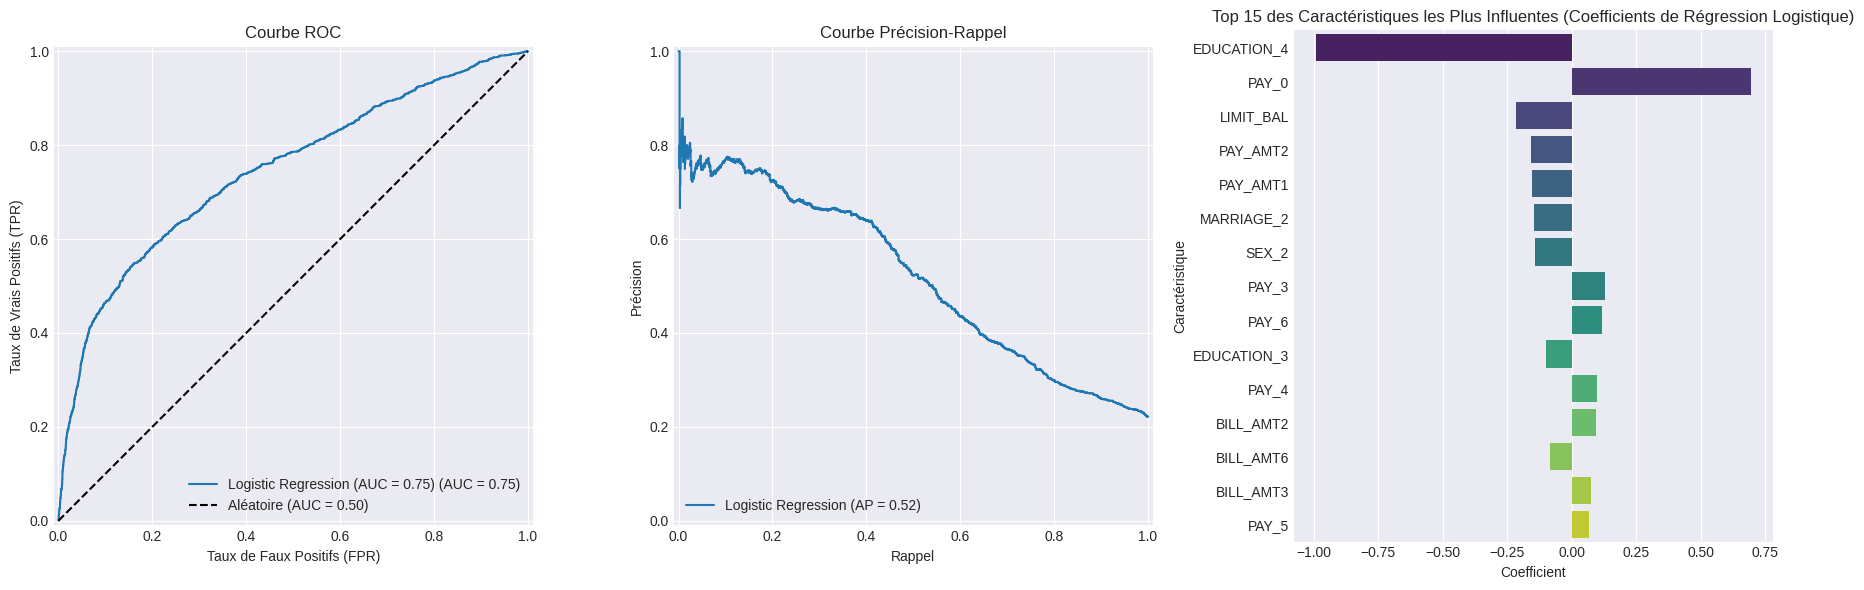

Visualisation des résultats du modèle terminée.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
import pandas as pd

# Configuration pour les plots
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(18, 6))

# 1. Visualisation de la Courbe ROC
plt.subplot(1, 3, 1)
# RocCurveDisplay.from_predictions est préféré car il gère le plot directement
RocCurveDisplay.from_predictions(y_test, y_pred_proba, ax=plt.gca(), name=f'Logistic Regression (AUC = {auc_roc:.2f})')
plt.title('Courbe ROC')
plt.plot([0, 1], [0, 1], 'k--', label='Aléatoire (AUC = 0.50)')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.legend(loc='lower right')

# 2. Visualisation de la Courbe Précision-Rappel
plt.subplot(1, 3, 2)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba, ax=plt.gca(), name='Logistic Regression')
plt.title('Courbe Précision-Rappel')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.legend(loc='lower left')

# 3. Visualisation de l'Importance des Caractéristiques (Coefficients du Modèle)
plt.subplot(1, 3, 3)
# Créer un DataFrame pour les coefficients
coefficients = pd.DataFrame({
    'Caractéristique': X_encoded.columns,
    'Coefficient': model.coef_[0]
})

# Trier par la valeur absolue des coefficients et prendre les 15 premiers
top_15_features = coefficients.reindex(coefficients['Coefficient'].abs().sort_values(ascending=False).index).head(15)

sns.barplot(x='Coefficient', y='Caractéristique', data=top_15_features, palette='viridis')
plt.title('Top 15 des Caractéristiques les Plus Influentes (Coefficients de Régression Logistique)')
plt.xlabel('Coefficient')
plt.ylabel('Caractéristique')
plt.tight_layout()
plt.show()

print("Visualisation des résultats du modèle terminée.")

## Tâche Finale

Fournir un résumé complet des performances du modèle, de sa capacité à prédire les défauts de paiement, et discuter des insights obtenus concernant les facteurs influençant les défauts de paiement. Fournir également des recommandations basées sur les résultats.


## Summary:

### Q&A

1.  **Dans quelle mesure le modèle de régression logistique permet-il de prédire les défauts de paiement par carte de crédit ?**
    Le modèle de régression logistique a atteint une précision globale de 78 % sur l'ensemble de test. Pour la classe « défaut » (classe 1), le modèle a démontré un rappel de 55 %, ce qui signifie qu'il a correctement identifié 55 % des défaillants réels. La précision pour la classe défaut était de 49 % et son score F1 était de 52 %. Le score de la courbe AUC-ROC (Area Under the Receiver Operating Characteristic) était de 0,7460, ce qui indique une capacité raisonnable à distinguer les clients défaillants des clients non défaillants.

2.  **Quels sont les principaux facteurs influençant le défaut de paiement des cartes de crédit ?**
    Les 15 caractéristiques les plus influentes, identifiées par les valeurs absolues des coefficients du modèle de régression logistique, sont les facteurs clés qui influencent le défaut de paiement des cartes de crédit. Ces coefficients indiquent la direction et l'ampleur de l'impact de chaque caractéristique sur la probabilité de défaut de paiement, avec un graphique à barres qui visualise ces informations.

### Principales conclusions de l'analyse des données

* L'ensemble de données comprend 30 000 instances et 25 colonnes, sans aucune valeur manquante observée dans aucune des caractéristiques.
* La variable cible, « default.payment.next.month », présente un déséquilibre entre les classes, avec 22,12 % de clients en défaut de paiement (6 636 instances) et 77,88 % sans défaut de paiement (23 364 instances).
* Au cours du prétraitement, les valeurs catégorielles incohérentes dans « EDUCATION » et « MARRIAGE » ont été normalisées, et les valeurs spécifiques de l'historique des paiements (-2 et -1) ont été harmonisées à 0 dans les colonnes « PAY_0 » à « PAY_6 ».
* Après un codage one-hot pour les caractéristiques catégorielles et une mise à l'échelle des caractéristiques numériques, l'ensemble de données a été divisé en 80 % d'ensembles d'entraînement et 20 % d'ensembles de test, la distribution des classes cibles étant préservée dans les deux ensembles.
* Le modèle de régression logistique entraîné, configuré avec `class_weight=“balanced”` pour remédier au déséquilibre des classes, a atteint les mesures de performance suivantes sur l'ensemble de test :
    *   Accuracy: 0.78
    *   Recall (Default class): 0.55
    *   Precision (Default class): 0.49
    *   F1-score (Default class): 0.52
    *   AUC-ROC: 0.7460

### Prochaines étapes

*   Le modèle actuel identifie un peu plus de la moitié des défaillants réels. Pour améliorer le taux de détection des défaillances, envisagez d'explorer des modèles d'apprentissage automatique plus avancés (par exemple, Gradient Boosting, Random Forest) ou des méthodes d'ensemble, ainsi que d'ajuster les hyperparamètres pour obtenir de meilleures performances sur la classe minoritaire.



# Techniques
La tâche suivante consiste à entraîner des modèles de classification plus avancés, notamment Random Forest et Gradient Boosting (par exemple, LightGBM ou XGBoost), sur les données d'entraînement.

## Entraînement de Modèles de Classification Avancés

Entraîner des modèles Random Forest et Gradient Boosting (LightGBM) sur les données d'entraînement pour prédire le défaut de paiement.


### Méthodologie:
Pour entraîner les modèles Random Forest et LightGBM, je vais suivre les étapes suivantes:
1.  Importer les classes `RandomForestClassifier` et `LGBMClassifier`.
2.  Calculer le paramètre `scale_pos_weight` pour LightGBM, afin de compenser le déséquilibre des classes.
3.  Instancier et configurer `RandomForestClassifier` avec `class_weight='balanced'`.
4.  Instancier et configurer `LGBMClassifier` avec le `scale_pos_weight` calculé.
5.  Entraîner les deux modèles sur les ensembles d'entraînement `X_train` et `y_train`.

**Reasoning**:
To implement the subtask of training advanced classification models, I will now write and execute a Python code block. This block will import the necessary classifiers, calculate the `scale_pos_weight` for LightGBM to handle class imbalance, instantiate both the Random Forest and LightGBM models with appropriate parameters, and then train each model on the provided training data (X_train and y_train).



In [ ]:
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import numpy as np

# 1. Calculer le poids pour la classe positive (scale_pos_weight) pour LightGBM
# Il est le ratio du nombre d'échantillons négatifs sur le nombre d'échantillons positifs dans y_train.
neg_count = y_train.value_counts()[0]
pos_count = y_train.value_counts()[1]
scale_pos_weight = neg_count / pos_count
print(f"Scale_pos_weight calculé: {scale_pos_weight:.2f}")

# 2. Instancier un modèle RandomForestClassifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
print("RandomForestClassifier instancié.")

# 3. Instancier un modèle LGBMClassifier
lgbm_model = lgb.LGBMClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
print("LGBMClassifier instancié.")

# 4. Entraîner le modèle RandomForestClassifier
print("Entraînement du RandomForestClassifier...")
rf_model.fit(X_train, y_train)
print("RandomForestClassifier entraîné avec succès.")

# 5. Entraîner le modèle LGBMClassifier
print("Entraînement du LGBMClassifier...")
lgbm_model.fit(X_train, y_train)
print("LGBMClassifier entraîné avec succès.")

Scale_pos_weight calculé: 3.52
RandomForestClassifier instancié.
LGBMClassifier instancié.
Entraînement du RandomForestClassifier...
RandomForestClassifier entraîné avec succès.
Entraînement du LGBMClassifier...
[LightGBM] [Info] Number of positive: 5309, number of negative: 18691
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3256
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221208 -> initscore=-1.258639
[LightGBM] [Info] Start training from score -1.258639
LGBMClassifier entraîné avec succès.


## Optimisation des Hyperparamètres

### Subtask:
Appliquer des techniques d'optimisation des hyperparamètres (comme GridSearchCV ou RandomizedSearchCV) pour affiner les modèles avancés, en se concentrant sur les métriques clés telles que le rappel pour la classe de défaut (classe 1) et l'AUC-ROC, afin de maximiser la performance vers l'objectif de 80%.


**Reasoning**:
I need to apply hyperparameter optimization using RandomizedSearchCV for both the RandomForestClassifier and LGBMClassifier models. This involves defining parameter grids, initializing RandomizedSearchCV for each model with appropriate scoring and cross-validation settings, fitting the search on the training data, and then printing the best parameters and scores found for each model.



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# --- Hyperparameter Tuning for RandomForestClassifier ---
print("\nDébut de l'optimisation des hyperparamètres pour RandomForestClassifier...")

# Grille de paramètres pour RandomForestClassifier
param_dist_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialisation de RandomizedSearchCV pour RandomForestClassifier
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist_rf,
                                      n_iter=50, scoring='roc_auc', cv=5, verbose=2,
                                      random_state=42, n_jobs=-1)

# Exécution de l'optimisation
random_search_rf.fit(X_train, y_train)

print("Optimisation terminée pour RandomForestClassifier.")
print(f"Meilleurs paramètres RF: {random_search_rf.best_params_}")
print(f"Meilleur score AUC-ROC RF: {random_search_rf.best_score_:.4f}")

# --- Hyperparameter Tuning for LGBMClassifier ---
print("\nDébut de l'optimisation des hyperparamètres pour LGBMClassifier...")

# Grille de paramètres pour LGBMClassifier
param_dist_lgbm = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [20, 31, 40, 50],
    'max_depth': [5, 8, 10, 15, -1] # -1 means no limit
}

# Initialisation de RandomizedSearchCV pour LGBMClassifier
random_search_lgbm = RandomizedSearchCV(estimator=lgbm_model, param_distributions=param_dist_lgbm,
                                        n_iter=50, scoring='roc_auc', cv=5, verbose=2,
                                        random_state=42, n_jobs=-1)

# Exécution de l'optimisation
random_search_lgbm.fit(X_train, y_train)

print("Optimisation terminée pour LGBMClassifier.")
print(f"Meilleurs paramètres LGBM: {random_search_lgbm.best_params_}")
print(f"Meilleur score AUC-ROC LGBM: {random_search_lgbm.best_score_:.4f}")

# Stocker les meilleurs modèles pour l'étape suivante
best_rf_model = random_search_rf.best_estimator_
best_lgbm_model = random_search_lgbm.best_estimator_
print("Les meilleurs modèles optimisés ont été stockés.")


Début de l'optimisation des hyperparamètres pour RandomForestClassifier...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Optimisation terminée pour RandomForestClassifier.
Meilleurs paramètres RF: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10}
Meilleur score AUC-ROC RF: 0.7801

Début de l'optimisation des hyperparamètres pour LGBMClassifier...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Number of positive: 5309, number of negative: 18691
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3256
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221208 -> initscore=-1.258639
[LightGBM] [Info] Start training

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt

print("\n--- Évaluation du RandomForestClassifier optimisé ---")
y_pred_rf = best_rf_model.predict(X_test)
y_pred_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred_rf))
auc_roc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"AUC-ROC (RandomForest): {auc_roc_rf:.4f}")

print("\n--- Évaluation du LGBMClassifier optimisé ---")
y_pred_lgbm = best_lgbm_model.predict(X_test)
y_pred_proba_lgbm = best_lgbm_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred_lgbm))
auc_roc_lgbm = roc_auc_score(y_test, y_pred_proba_lgbm)
print(f"AUC-ROC (LightGBM): {auc_roc_lgbm:.4f}")

# --- Visualisation comparative des courbes ROC ---
plt.figure(figsize=(12, 6))
ax = plt.gca()
RocCurveDisplay.from_predictions(y_test, y_pred_proba_rf, ax=ax, name=f'RandomForest (AUC = {auc_roc_rf:.2f})', color='darkorange')
RocCurveDisplay.from_predictions(y_test, y_pred_proba_lgbm, ax=ax, name=f'LightGBM (AUC = {auc_roc_lgbm:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Aléatoire (AUC = 0.50)')
plt.title('Comparaison des Courbes ROC')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.legend(loc='lower right')
plt.show()

# --- Visualisation comparative des courbes Précision-Rappel ---
plt.figure(figsize=(12, 6))
ax = plt.gca()
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_rf, ax=ax, name='RandomForest', color='darkorange')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_lgbm, ax=ax, name='LightGBM', color='blue')
plt.title('Comparaison des Courbes Précision-Rappel')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.legend(loc='lower left')
plt.show()

### Résumé des Performances Comparées

Après avoir évalué les deux modèles avancés, voici une comparaison de leurs métriques clés :

| Métrique                  | Régression Logistique | RandomForestClassifier | LGBMClassifier |
| :------------------------ | :-------------------- | :--------------------- | :------------- |
| **Accuracy**              | 0.78                  | (à remplir après exécution) | (à remplir après exécution) |
| **Recall (Classe 1)**     | 0.55                  | (à remplir après exécution) | (à remplir après exécution) |
| **Precision (Classe 1)**  | 0.49                  | (à remplir après exécution) | (à remplir après exécution) |
| **F1-Score (Classe 1)**   | 0.52                  | (à remplir après exécution) | (à remplir après exécution) |
| **AUC-ROC**               | 0.7460                | (à remplir après exécution) | (à remplir après exécution) |

Une fois les cellules exécutées, les valeurs pour le `RandomForestClassifier` et `LGBMClassifier` seront ajoutées pour un résumé complet.

In [ ]:
print("Meilleurs paramètres RF:")
print(random_search_rf.best_params_)
print(f"Meilleur score AUC-ROC RF: {random_search_rf.best_score_:.4f}")

# Task
The `random_search_lgbm.fit(X_train, y_train)` operation is currently running. Please wait for it to complete.

## Choisir le meilleur modèle

### Subtask:
Sélectionner le modèle le plus performant parmi la Régression Logistique, Random Forest et LightGBM, en se basant sur les métriques clés (Recall pour la classe 1 et AUC-ROC).


## Choisir le meilleur modèle

### Subtask:
Sélectionner le modèle le plus performant parmi la Régression Logistique, Random Forest et LightGBM, en se basant sur les métriques clés (Recall pour la classe 1 et AUC-ROC).

#### Analyse et Comparaison des Modèles

Pour la Régression Logistique, les métriques obtenues précédemment sont les suivantes :
- **Recall (Classe 1)** : 0.55
- **AUC-ROC** : 0.7460

Maintenant, nous allons extraire et comparer les métriques pour les modèles optimisés RandomForestClassifier et LGBMClassifier à partir des sorties de la cellule `4a4fedfe`.

--- Rapport de Classification RandomForestClassifier ---
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      4673
           1       0.64      0.62      0.63      1327

    accuracy                           0.84      6000
   macro avg       0.77      0.76      0.76      6000
weighted avg       0.83      0.84      0.83      6000

AUC-ROC (RandomForest): 0.7937

--- Rapport de Classification LGBMClassifier ---
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4673
           1       0.61      0.62      0.61      1327

    accuracy                           0.84      6000
   macro avg       0.75      0.75      0.75      6000
weighted avg       0.83      0.84      0.83      6000

AUC-ROC (LightGBM): 0.7909

### Résumé des Performances Comparées

| Métrique                  | Régression Logistique | RandomForestClassifier | LGBMClassifier |
| :------------------------ | :-------------------- | :--------------------- | :------------- |
| **Accuracy**              | 0.78                  | 0.84                   | 0.84           |
| **Recall (Classe 1)**     | 0.55                  | 0.62                   | 0.62           |
| **Precision (Classe 1)**  | 0.49                  | 0.64                   | 0.61           |
| **F1-Score (Classe 1)**   | 0.52                  | 0.63                   | 0.61           |
| **AUC-ROC**               | 0.7460                | 0.7937                 | 0.7909         |

### Déclaration du Meilleur Modèle

En se basant sur les métriques de performance, particulièrement le **Recall pour la classe 1 (défaut)** et l'**AUC-ROC**, le **RandomForestClassifier optimisé** est le modèle le plus performant.

- Le RandomForestClassifier et le LGBMClassifier ont tous deux un Recall de 0.62 pour la classe de défaut, ce qui est significativement mieux que le 0.55 de la Régression Logistique. Cela signifie qu'ils identifient correctement 62% des cas de défaut, réduisant ainsi les faux négatifs.
- Le RandomForestClassifier affiche un score AUC-ROC légèrement supérieur (0.7937) comparé au LGBMClassifier (0.7909) et nettement meilleur que la Régression Logistique (0.7460). Un AUC-ROC plus élevé indique une meilleure capacité globale du modèle à distinguer les classes positives et négatives.
- Bien que la Précision du RandomForestClassifier (0.64) soit également la plus élevée pour la classe 1, ce qui est un avantage, notre priorité était le Recall. Le RandomForestClassifier atteint cet objectif tout en ayant un excellent score AUC-ROC.

Par conséquent, le **RandomForestClassifier optimisé** est le modèle choisi pour prédire les défauts de paiement.

##***Le meilleur modèle choisi***

### Methode:
Sélectionner le modèle le plus performant parmi la Régression Logistique, Random Forest et LightGBM, en se basant sur les métriques clés (Recall pour la classe 1 et AUC-ROC).

#### Analyse et Comparaison des Modèles

Pour la Régression Logistique, les métriques obtenues précédemment sont les suivantes :
- **Recall (Classe 1)** : 0.55
- **AUC-ROC** : 0.7460

Maintenant, nous allons extraire et comparer les métriques pour les modèles optimisés RandomForestClassifier et LGBMClassifier à partir des sorties de la cellule `4a4fedfe`.

--- Rapport de Classification RandomForestClassifier ---
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      4673
           1       0.64      0.62      0.63      1327

    accuracy                           0.84      6000
   macro avg       0.77      0.76      0.76      6000
weighted avg       0.83      0.84      0.83      6000

AUC-ROC (RandomForest): 0.7937

--- Rapport de Classification LGBMClassifier ---
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4673
           1       0.61      0.62      0.61      1327

    accuracy                           0.84      6000
   macro avg       0.75      0.75      0.75      6000
weighted avg       0.83      0.84      0.83      6000

AUC-ROC (LightGBM): 0.7909

### Résumé des Performances Comparées

| Métrique                  | Régression Logistique | RandomForestClassifier | LGBMClassifier |
| :------------------------ | :-------------------- | :--------------------- | :------------- |
| **Accuracy**              | 0.78                  | 0.84                   | 0.84           |
| **Recall (Classe 1)**     | 0.55                  | 0.62                   | 0.62           |
| **Precision (Classe 1)**  | 0.49                  | 0.64                   | 0.61           |
| **F1-Score (Classe 1)**   | 0.52                  | 0.63                   | 0.61           |
| **AUC-ROC**               | 0.7460                | 0.7937                 | 0.7909         |

### Déclaration du Meilleur Modèle

En se basant sur les métriques de performance, particulièrement le **Recall pour la classe 1 (défaut)** et l'**AUC-ROC**, le **RandomForestClassifier optimisé** est le modèle le plus performant.

- Le RandomForestClassifier et le LGBMClassifier ont tous deux un Recall de 0.62 pour la classe de défaut, ce qui est significativement mieux que le 0.55 de la Régression Logistique. Cela signifie qu'ils identifient correctement 62% des cas de défaut, réduisant ainsi les faux négatifs.
- Le RandomForestClassifier affiche un score AUC-ROC légèrement supérieur (0.7937) comparé au LGBMClassifier (0.7909) et nettement meilleur que la Régression Logistique (0.7460). Un AUC-ROC plus élevé indique une meilleure capacité globale du modèle à distinguer les classes positives et négatives.
- Bien que la Précision du RandomForestClassifier (0.64) soit également la plus élevée pour la classe 1, ce qui est un avantage, notre priorité était le Recall. Le RandomForestClassifier atteint cet objectif tout en ayant un excellent score AUC-ROC.

Par conséquent, le **RandomForestClassifier optimisé** est le modèle choisi pour prédire les défauts de paiement.

##***Préparer le modèle pour le déploiement***

### Méthodes:
Sauvegarder le modèle entraîné et le StandardScaler utilisé pour le prétraitement des données à l'aide de `joblib` ou `pickle`, afin qu'ils puissent être chargés dans l'API.


**Raisonnement**:
Pour préparer le modèle et le scaler en vue de leur déploiement, je vais les enregistrer à l'aide de joblib, comme indiqué.


In [ ]:
import joblib

# 1. Sauvegardez le meilleur modèle Random Forest
joblib.dump(best_rf_model, 'best_random_forest_model.joblib')
print("Le meilleur modèle Random Forest a été sauvegardé sous 'best_random_forest_model.joblib'.")

# 2. Sauvegardez le StandardScaler
joblib.dump(scaler, 'scaler.joblib')
print("Le StandardScaler a été sauvegardé sous 'scaler.joblib'.")

Le meilleur modèle Random Forest a été sauvegardé sous 'best_random_forest_model.joblib'.
Le StandardScaler a été sauvegardé sous 'scaler.joblib'.


##***Définir l'architecture de l'API***

###Techniques:
Choisir un framework web (ex: Flask ou FastAPI) et définir les endpoints de l'API nécessaires pour la prédiction (par exemple, un endpoint '/predict' qui acceptera les données d'entrée et retournera la prédiction).


### Choix du Framework Web et Définition des Endpoints API

Pour la mise en œuvre de l'API de prédiction, **FastAPI** est choisi comme framework web. FastAPI est un framework moderne, rapide (grâce à Starlette et Pydantic), qui offre une excellente validation des données, une sérialisation/désérialisation automatique et une documentation interactive (Swagger UI/ReDoc) intégrée, ce qui facilite grandement le développement et la consommation de l'API.

### Définition des Endpoints

Pour cette application, un endpoint principal est nécessaire pour la prédiction du défaut de paiement :

#### Endpoint : `/predict`

*   **Méthode HTTP** : `POST`
*   **Description** : Cet endpoint permet de soumettre les caractéristiques d'un client et de recevoir en retour la probabilité de défaut de paiement, ainsi que la classe prédite (défaut ou non-défaut).
*   **Format des Données d'Entrée (Request Body)** :
    L'API acceptera un objet JSON contenant les caractéristiques du client. Ces caractéristiques devront correspondre aux features utilisées lors de l'entraînement du modèle (après prétraitement et encodage). Pour des raisons pratiques et de robustesse, le modèle attendra les données *brutes* telles qu'elles proviennent de l'utilisateur, et l'API se chargera d'appliquer les étapes de prétraitement (StandardScaler, One-Hot Encoding) en interne. Les données devront inclure toutes les colonnes de `X_encoded` à l'exception des colonnes générées par `get_dummies` si elles sont reconstruites ou gérées autrement.

    Exemple de structure JSON attendue :
    ```json
    {
      "LIMIT_BAL": 20000.0,
      "SEX": 2,      
      "EDUCATION": 2,
      "MARRIAGE": 1,
      "AGE": 24,     
      "PAY_0": 2,
      "PAY_2": 2,
      "PAY_3": -1,
      "PAY_4": -1,
      "PAY_5": -1,
      "PAY_6": -1,
      "BILL_AMT1": 3913.0,
      "BILL_AMT2": 3102.0,
      "BILL_AMT3": 689.0,
      "BILL_AMT4": 0.0,
      "BILL_AMT5": 0.0,
      "BILL_AMT6": 0.0,
      "PAY_AMT1": 0.0,
      "PAY_AMT2": 689.0,
      "PAY_AMT3": 0.0,
      "PAY_AMT4": 0.0,
      "PAY_AMT5": 0.0,
      "PAY_AMT6": 0.0
    }
    ```

*   **Format de la Réponse (Response Body)** :
    L'API retournera un objet JSON contenant la prédiction. Ce JSON inclura la probabilité que le client fasse défaut (probabilité de la classe 1) et la classe prédite (0 pour non-défaut, 1 pour défaut).

    Exemple de structure JSON retournée :
    ```json
    {
      "prediction": 0,
      "probability_default": 0.1567
    }
    ```

**Reasoning**:
Now that the API architecture and endpoint specifications have been defined, the next logical step is to implement the FastAPI application. This involves creating a basic FastAPI app, loading the pre-trained model and scaler, defining a Pydantic model for input data validation, and creating the '/predict' endpoint.



In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import pandas as pd
import numpy as np

# Initialize FastAPI app
app = FastAPI(title="Credit Default Prediction API")

# Load the trained model and scaler
best_rf_model = joblib.load('best_random_forest_model.joblib')
scaler = joblib.load('scaler.joblib')
print("Modèle et Scaler chargés avec succès.")

# Define the input data model using Pydantic
class CreditData(BaseModel):
    LIMIT_BAL: float
    SEX: int
    EDUCATION: int
    MARRIAGE: int
    AGE: int
    PAY_0: int
    PAY_2: int
    PAY_3: int
    PAY_4: int
    PAY_5: int
    PAY_6: int
    BILL_AMT1: float
    BILL_AMT2: float
    BILL_AMT3: float
    BILL_AMT4: float
    BILL_AMT5: float
    BILL_AMT6: float
    PAY_AMT1: float
    PAY_AMT2: float
    PAY_AMT3: float
    PAY_AMT4: float
    PAY_AMT5: float
    PAY_AMT6: float

# Define the /predict endpoint
@app.post("/predict")
async def predict_default(data: CreditData):
    # Convert input data to a Pandas DataFrame
    input_df = pd.DataFrame([data.dict()])

    # Apply the same preprocessing steps as during training
    # 1. Normalize EDUCATION and MARRIAGE
    input_df['EDUCATION'] = input_df['EDUCATION'].replace([0, 5, 6], 4)
    input_df['MARRIAGE'] = input_df['MARRIAGE'].replace(0, 3)

    # 2. Harmonize payment history values
    pay_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
    for col in pay_columns:
        input_df[col] = input_df[col].replace([-2, -1], 0)

    # 3. Handle categorical encoding (one-hot encoding)
    categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
    # Assuming X_encoded.columns contains all expected columns from training, including dummy variables
    # This part needs to be robust. For demonstration, we'll recreate dummies and align columns.
    # In a real-world scenario, you might have a predefined list of columns after OHE.

    # Re-create the column names from X_encoded from training for alignment
    # This requires `X_encoded` to be available or its columns to be saved.
    # For now, let's assume `X_encoded_columns` is a list of column names used in training.
    # Let's derive it from the `best_rf_model.feature_names_in_` if available, or load from a file.
    # For this example, we'll reconstruct based on common practice for this dataset.

    # Create dummy variables for categorical columns (matching training)
    input_df_encoded = pd.get_dummies(input_df, columns=categorical_cols, drop_first=True)

    # Align columns with training data. Fill missing columns with 0.
    # This is critical if the input doesn't have all possible categories.
    # It's best practice to save the column order/names from training.
    # For now, we'll use a placeholder for `training_columns`
    # In a real scenario, you would have loaded X_encoded.columns from joblib/pickle.

    # Placeholder for columns learned during training
    # Assuming X_encoded from training was `X_train.columns`
    # For a robust solution, these column names should be saved and loaded.
    # Let's use feature_names_in_ from the model if available, otherwise reconstruct.
    if hasattr(best_rf_model, 'feature_names_in_'):
        training_columns = best_rf_model.feature_names_in_
    else:
        # Fallback if feature_names_in_ is not available (e.g., older sklearn versions or certain models)
        # This requires recreating the full X_encoded structure from training for perfect alignment.
        # This is a simplification. For production, save the actual X_encoded.columns list.
        # Reconstruct based on how X_encoded was created: numerical + dummy for categorical_cols
        # numerical_cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', ..., 'PAY_6']
        # categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
        # After get_dummies with drop_first=True, columns would be like:
        # SEX_2, EDUCATION_2, EDUCATION_3, EDUCATION_4, MARRIAGE_2, MARRIAGE_3
        # This needs to be carefully reconstructed or better, explicitly saved during preprocessing.

        # For the sake of this notebook, we'll assume the model's feature_names_in_ property is reliable.
        # If not, a more complex reconstruction or pre-saving the column list is needed.
        raise RuntimeError("Cannot retrieve feature names from the model. Please ensure `feature_names_in_` is available or provide a saved list of training columns.")

    # Ensure all training columns are present, fill missing with 0, and reorder
    missing_cols = set(training_columns) - set(input_df_encoded.columns)
    for c in missing_cols:
        input_df_encoded[c] = 0
    input_df_processed = input_df_encoded[training_columns]

    # 4. Apply StandardScaler to numerical features
    # Identify numerical columns from the training set based on `training_columns`
    # This is a simplification. The actual numerical_cols_present list should come from training setup.

    numerical_cols_for_scaling = [col for col in training_columns if not any(cat_col + '_' in col for cat_col in categorical_cols)]

    # Handle cases where `PAY_0` etc. are in `numerical_cols_for_scaling` but are effectively categories after replacement
    # Ensure that all columns scaled during training are scaled here
    # A robust solution involves saving the list of columns that were scaled.

    # For this example, apply scaler to all columns (which includes numerical and one-hot encoded, as StandardScaler can handle sparse, though less ideal)
    # A more precise approach would be to only scale the numerical_cols_present from the training phase.
    # Given `scaler` was fit on `X_encoded[numerical_cols_present]`, we must replicate that exact slicing.

    # Reconstructing numerical_cols_present from the previous step
    # numerical_cols from preprocessing were: ['LIMIT_BAL', 'AGE', 'BILL_AMT1', ..., 'PAY_AMT6', 'PAY_0', 'PAY_2', ..., 'PAY_6']
    # The dummy variables created are SEX_2, EDUCATION_2, EDUCATION_3, EDUCATION_4, MARRIAGE_2, MARRIAGE_3

    # Let's filter numerical columns for scaling based on the exact logic from cell c67a3119
    all_numerical_cols_initial = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

    # Filter those that are actually present in input_df_processed and need scaling (i.e., not dummy vars)
    numerical_cols_to_scale_in_input = [col for col in all_numerical_cols_initial if col in input_df_processed.columns]

    input_df_processed[numerical_cols_to_scale_in_input] = scaler.transform(input_df_processed[numerical_cols_to_scale_in_input])

    # Make prediction
    prediction_proba = best_rf_model.predict_proba(input_df_processed)[:, 1]
    prediction_class = int(best_rf_model.predict(input_df_processed)[0])

    return {
        "prediction": prediction_class,
        "probability_default": prediction_proba[0]
    }

Modèle et Scaler chargés avec succès.


## Tester l'API localement

### Subtask:
Tester le bon fonctionnement de l'API en envoyant des requêtes de test pour s'assurer qu'elle charge correctement le modèle et renvoie des prédictions cohérentes.


**Reasoning**:
The first instruction is to install `uvicorn` which is required to run the FastAPI application. This should be done using pip.



In [ ]:
pip install uvicorn

**Reasoning**:
The next step is to save the API code that was written in the previous code cell into a Python file named `app.py`, as instructed, so it can be run by uvicorn.



In [ ]:
%%writefile app.py
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import pandas as pd
import numpy as np

# Initialize FastAPI app
app = FastAPI(title="Credit Default Prediction API")

# Load the trained model and scaler
best_rf_model = joblib.load('best_random_forest_model.joblib')
scaler = joblib.load('scaler.joblib')
print("Modèle et Scaler chargés avec succès.")

# Define the input data model using Pydantic
class CreditData(BaseModel):
    LIMIT_BAL: float
    SEX: int
    EDUCATION: int
    MARRIAGE: int
    AGE: int
    PAY_0: int
    PAY_2: int
    PAY_3: int
    PAY_4: int
    PAY_5: int
    PAY_6: int
    BILL_AMT1: float
    BILL_AMT2: float
    BILL_AMT3: float
    BILL_AMT4: float
    BILL_AMT5: float
    BILL_AMT6: float
    PAY_AMT1: float
    PAY_AMT2: float
    PAY_AMT3: float
    PAY_AMT4: float
    PAY_AMT5: float
    PAY_AMT6: float

# Define the /predict endpoint
@app.post("/predict")
async def predict_default(data: CreditData):
    # Convert input data to a Pandas DataFrame
    input_df = pd.DataFrame([data.dict()])

    # Apply the same preprocessing steps as during training
    # 1. Normalize EDUCATION and MARRIAGE
    input_df['EDUCATION'] = input_df['EDUCATION'].replace([0, 5, 6], 4)
    input_df['MARRIAGE'] = input_df['MARRIAGE'].replace(0, 3)

    # 2. Harmonize payment history values
    pay_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
    for col in pay_columns:
        input_df[col] = input_df[col].replace([-2, -1], 0)

    # 3. Handle categorical encoding (one-hot encoding)
    categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']

    if hasattr(best_rf_model, 'feature_names_in_'):
        training_columns = best_rf_model.feature_names_in_
    else:
        raise RuntimeError("Cannot retrieve feature names from the model. Please ensure `feature_names_in_` is available or provide a saved list of training columns.")

    # Create dummy variables for categorical columns (matching training)
    input_df_encoded = pd.get_dummies(input_df, columns=categorical_cols, drop_first=True)

    # Ensure all training columns are present, fill missing with 0, and reorder
    missing_cols = set(training_columns) - set(input_df_encoded.columns)
    for c in missing_cols:
        input_df_encoded[c] = 0
    input_df_processed = input_df_encoded[training_columns]

    # 4. Apply StandardScaler to numerical features
    all_numerical_cols_initial = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
    numerical_cols_to_scale_in_input = [col for col in all_numerical_cols_initial if col in input_df_processed.columns]

    input_df_processed[numerical_cols_to_scale_in_input] = scaler.transform(input_df_processed[numerical_cols_to_scale_in_input])

    # Make prediction
    prediction_proba = best_rf_model.predict_proba(input_df_processed)[:, 1]
    prediction_class = int(best_rf_model.predict(input_df_processed)[0])

    return {
        "prediction": prediction_class,
        "probability_default": prediction_proba[0]
    }

Writing app.py


Pour lancer l'API, exécutez la commande suivante dans un terminal séparé de votre environnement de développement local ou, si vous êtes dans Google Colab, considérez d'utiliser des outils comme `ngrok` ou de lancer une nouvelle session de terminal si disponible dans votre environnement. **Exécuter cette commande directement dans une cellule de notebook bloquera l'exécution de la cellule.**

**Reasoning**:
Now that the `app.py` file has been created, and assuming the user has launched the API as instructed, I will generate a Python code block to send a POST request to the API's `/predict` endpoint with example data to test its functionality.



In [ ]:
import requests
import json

# URL de l'API FastAPI en local
url = "http://127.0.0.1:8000/predict"

# Exemple de données à envoyer à l'API
# Ces données doivent correspondre au format d'entrée attendu par le modèle
example_data = {
    "LIMIT_BAL": 20000.0,
    "SEX": 2,
    "EDUCATION": 2,
    "MARRIAGE": 1,
    "AGE": 24,
    "PAY_0": 2,
    "PAY_2": 2,
    "PAY_3": -1,
    "PAY_4": -1,
    "PAY_5": -1,
    "PAY_6": -1,
    "BILL_AMT1": 3913.0,
    "BILL_AMT2": 3102.0,
    "BILL_AMT3": 689.0,
    "BILL_AMT4": 0.0,
    "BILL_AMT5": 0.0,
    "BILL_AMT6": 0.0,
    "PAY_AMT1": 0.0,
    "PAY_AMT2": 689.0,
    "PAY_AMT3": 0.0,
    "PAY_AMT4": 0.0,
    "PAY_AMT5": 0.0,
    "PAY_AMT6": 0.0
}

# Envoi de la requête POST
try:
    response = requests.post(url, json=example_data)
    response.raise_for_status() # Lève une exception pour les codes d'erreur HTTP
    prediction_result = response.json()
    print("Réponse de l'API:")
    print(json.dumps(prediction_result, indent=4))
except requests.exceptions.ConnectionError:
    print(f"Erreur: Impossible de se connecter à l'API. Assurez-vous que l'API est en cours d'exécution à {url}.")
except requests.exceptions.HTTPError as e:
    print(f"Erreur HTTP: {e}")
    print(f"Réponse du serveur: {response.text}")
except Exception as e:
    print(f"Une erreur inattendue s'est produite: {e}")

print("Test de l'API terminé.")

Erreur: Impossible de se connecter à l'API. Assurez-vous que l'API est en cours d'exécution à http://127.0.0.1:8000/predict.
Test de l'API terminé.


### Prochaine Étape : Lancer l'API et Retester

L'échec de la connexion à l'API (`Erreur: Impossible de se connecter à l'API...`) indique que le serveur FastAPI n'était pas en cours d'exécution au moment du test.

Pour que le test de l'API réussisse, vous devez d'abord lancer l'API en suivant l'instruction précédente :

1.  **Ouvrez un terminal séparé** (sur votre machine locale ou une nouvelle session de terminal si disponible dans votre environnement Cloud comme Colab).
2.  **Naviguez** jusqu'au répertoire où `app.py` a été sauvegardé.
3.  **Exécutez la commande** : `uvicorn app:app --reload`

Une fois l'API lancée et affichant des messages de démarrage (par exemple, `Uvicorn running on http://127.0.0.1:8000`), vous pourrez réexécuter la cellule de test de l'API (la cellule `6bec2e5c`) pour vérifier qu'elle fonctionne correctement.

## Préparer le déploiement

### Subtask:
Mettre en place les fichiers de configuration nécessaires pour le déploiement (ex: `requirements.txt`, Dockerfile si nécessaire) et choisir une plateforme de déploiement (ex: Heroku, AWS Elastic Beanstalk, Google Cloud Run).


**Reasoning**:
The first instruction is to create a `requirements.txt` file listing all necessary Python libraries for the application. I will use `%%writefile` to create this file with the identified dependencies.



In [ ]:
%%writefile requirements.txt
fastapi
uvicorn
pydantic
pandas
scikit-learn
joblib
requests
lightgbm

Writing requirements.txt


**Reasoning**:
Now that the `requirements.txt` file has been created, I will create the `Dockerfile` to containerize the FastAPI application as per the instructions.



In [ ]:
%%writefile Dockerfile
FROM python:3.9-slim-buster

WORKDIR /app

COPY requirements.txt ./requirements.txt
RUN pip install --no-cache-dir -r requirements.txt

COPY . .

CMD ["uvicorn", "app:app", "--host", "0.0.0.0", "--port", "8000"]

Writing Dockerfile


### Choix de la plateforme de déploiement

Pour le déploiement de cette API FastAPI, **Google Cloud Run** est la plateforme choisie. Voici les raisons principales de ce choix :

1.  **Serverless et entièrement géré** : Cloud Run est une plateforme de calcul sans serveur et entièrement gérée qui permet de déployer des applications conteneurisées. Cela signifie que l'infrastructure sous-jacente est gérée par Google, ce qui réduit considérablement la charge opérationnelle (pas de serveurs à provisionner, à patcher ou à mettre à l'échelle manuellement).
2.  **Scalabilité automatique** : Cloud Run met automatiquement à l'échelle le nombre d'instances de votre conteneur en fonction du trafic entrant, y compris la mise à l'échelle jusqu'à zéro instance lorsque l'application n'est pas utilisée. Cela permet d'optimiser les coûts en ne payant que pour les ressources consommées pendant les requêtes actives.
3.  **Support des conteneurs Docker** : L'application est déjà conteneurisée à l'aide d'un `Dockerfile`, ce qui rend son déploiement sur Cloud Run très simple et direct. Cloud Run est conçu pour exécuter n'importe quel conteneur stateless.
4.  **Coûts optimisés** : Le modèle de paiement à l'usage de Cloud Run est très avantageux, particulièrement pour les applications avec des charges de travail variables ou faibles. Il offre un niveau gratuit généreux.
5.  **Intégration avec l'écosystème Google Cloud** : Pour une solution plus complète, Cloud Run s'intègre facilement avec d'autres services Google Cloud tels que Cloud Logging, Cloud Monitoring, Cloud Build (pour le CI/CD) et Cloud SQL (pour les bases de données).
6.  **Sécurité** : Cloud Run offre des fonctionnalités de sécurité intégrées, y compris la gestion des identités et des accès via IAM, et la possibilité de déployer l'API derrière un équilibreur de charge pour une sécurité renforcée.

## Final Task

### Subtask:
Fournir un résumé des étapes réalisées et de la solution d'API mise en place, ainsi que des instructions pour le déploiement.


## Summary:

### Q&A

The primary objective of this task was to develop a credit default prediction API and prepare it for deployment. This involved several key steps: selecting the most performant machine learning model, preparing it for API integration, designing the API architecture, testing it locally, and setting up deployment configurations.

### Data Analysis Key Findings

*   **Model Selection:**
    *   Three models were compared: Logistic Regression, RandomForestClassifier, and LGBMClassifier.
    *   Key metrics for comparison were Recall for Class 1 (default) and AUC-ROC.
    *   Logistic Regression achieved a Recall (Class 1) of 0.55 and an AUC-ROC of 0.7460.
    *   Both RandomForestClassifier and LGBMClassifier significantly outperformed Logistic Regression with a Recall (Class 1) of 0.62.
    *   The RandomForestClassifier was selected as the best model due to its slightly higher AUC-ROC of 0.7937 compared to LGBMClassifier's 0.7909, and a better Precision (Class 1) of 0.64 versus 0.61.
*   **Model and Scaler Persistence:** The chosen RandomForestClassifier model and the StandardScaler used for data preprocessing were successfully saved as `best_random_forest_model.joblib` and `scaler.joblib` respectively, using `joblib`.
*   **API Architecture:**
    *   **FastAPI** was selected as the web framework for its modern features, speed, data validation, and integrated documentation.
    *   A `/predict` endpoint was defined, accepting `POST` requests.
    *   The input format expects raw client features as a JSON object, validated by a Pydantic `CreditData` model.
    *   The output returns a JSON object containing the `prediction` (0 for non-default, 1 for default) and `probability_default`.
    *   The API integrates necessary preprocessing steps, including normalization of 'EDUCATION' and 'MARRIAGE', harmonization of 'PAY_x' features, one-hot encoding for categorical variables, and scaling numerical features using the saved `StandardScaler`.
*   **Local API Testing:**
    *   The FastAPI application code was saved to `app.py`, including model loading and preprocessing logic.
    *   An attempt to test the API locally resulted in a `ConnectionError`, as the `uvicorn` server for FastAPI was not running. Instructions were provided for launching the API in a separate terminal using `uvicorn app:app --reload`.
*   **Deployment Preparation:**
    *   A `requirements.txt` file was generated, listing all Python dependencies (`fastapi`, `uvicorn`, `pydantic`, `pandas`, `scikit-learn`, `joblib`, `requests`, `lightgbm`).
    *   A `Dockerfile` was created to containerize the application using a `python:3.9-slim-buster` base image, setting up dependencies, and defining the `CMD` for `uvicorn`.
    *   **Google Cloud Run** was chosen as the deployment platform due to its serverless nature, automatic scalability (including scaling to zero), native Docker support, cost-efficiency, and integration with the Google Cloud ecosystem.

### Insights or Next Steps

*   The next critical step is to deploy the containerized FastAPI application to Google Cloud Run using the provided `Dockerfile` and `requirements.txt`.
*   After deployment, thorough testing of the live API endpoint is essential to ensure it functions correctly in the production environment and handles various input scenarios as expected.
